<a href="https://colab.research.google.com/github/marwan-hamzawy/customer-segmentation-clustering-PCA/blob/main/Customer_Segmentation_%7C_K_means%2C_Hierarchical%2C_and_Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Dataset/CC GENERAL.csv")
# print(data.shape)
# data.head()
df = pd.DataFrame(data)
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
print(df.shape)

(8950, 18)


In [ ]:
df.columns


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
CUST_ID,0
BALANCE,0
PRC_FULL_PAYMENT,0
PAYMENTS,0
PURCHASES_TRX,0
CASH_ADVANCE_TRX,0
CASH_ADVANCE_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
data.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
# data.fillna(data.mean(), inplace=True)

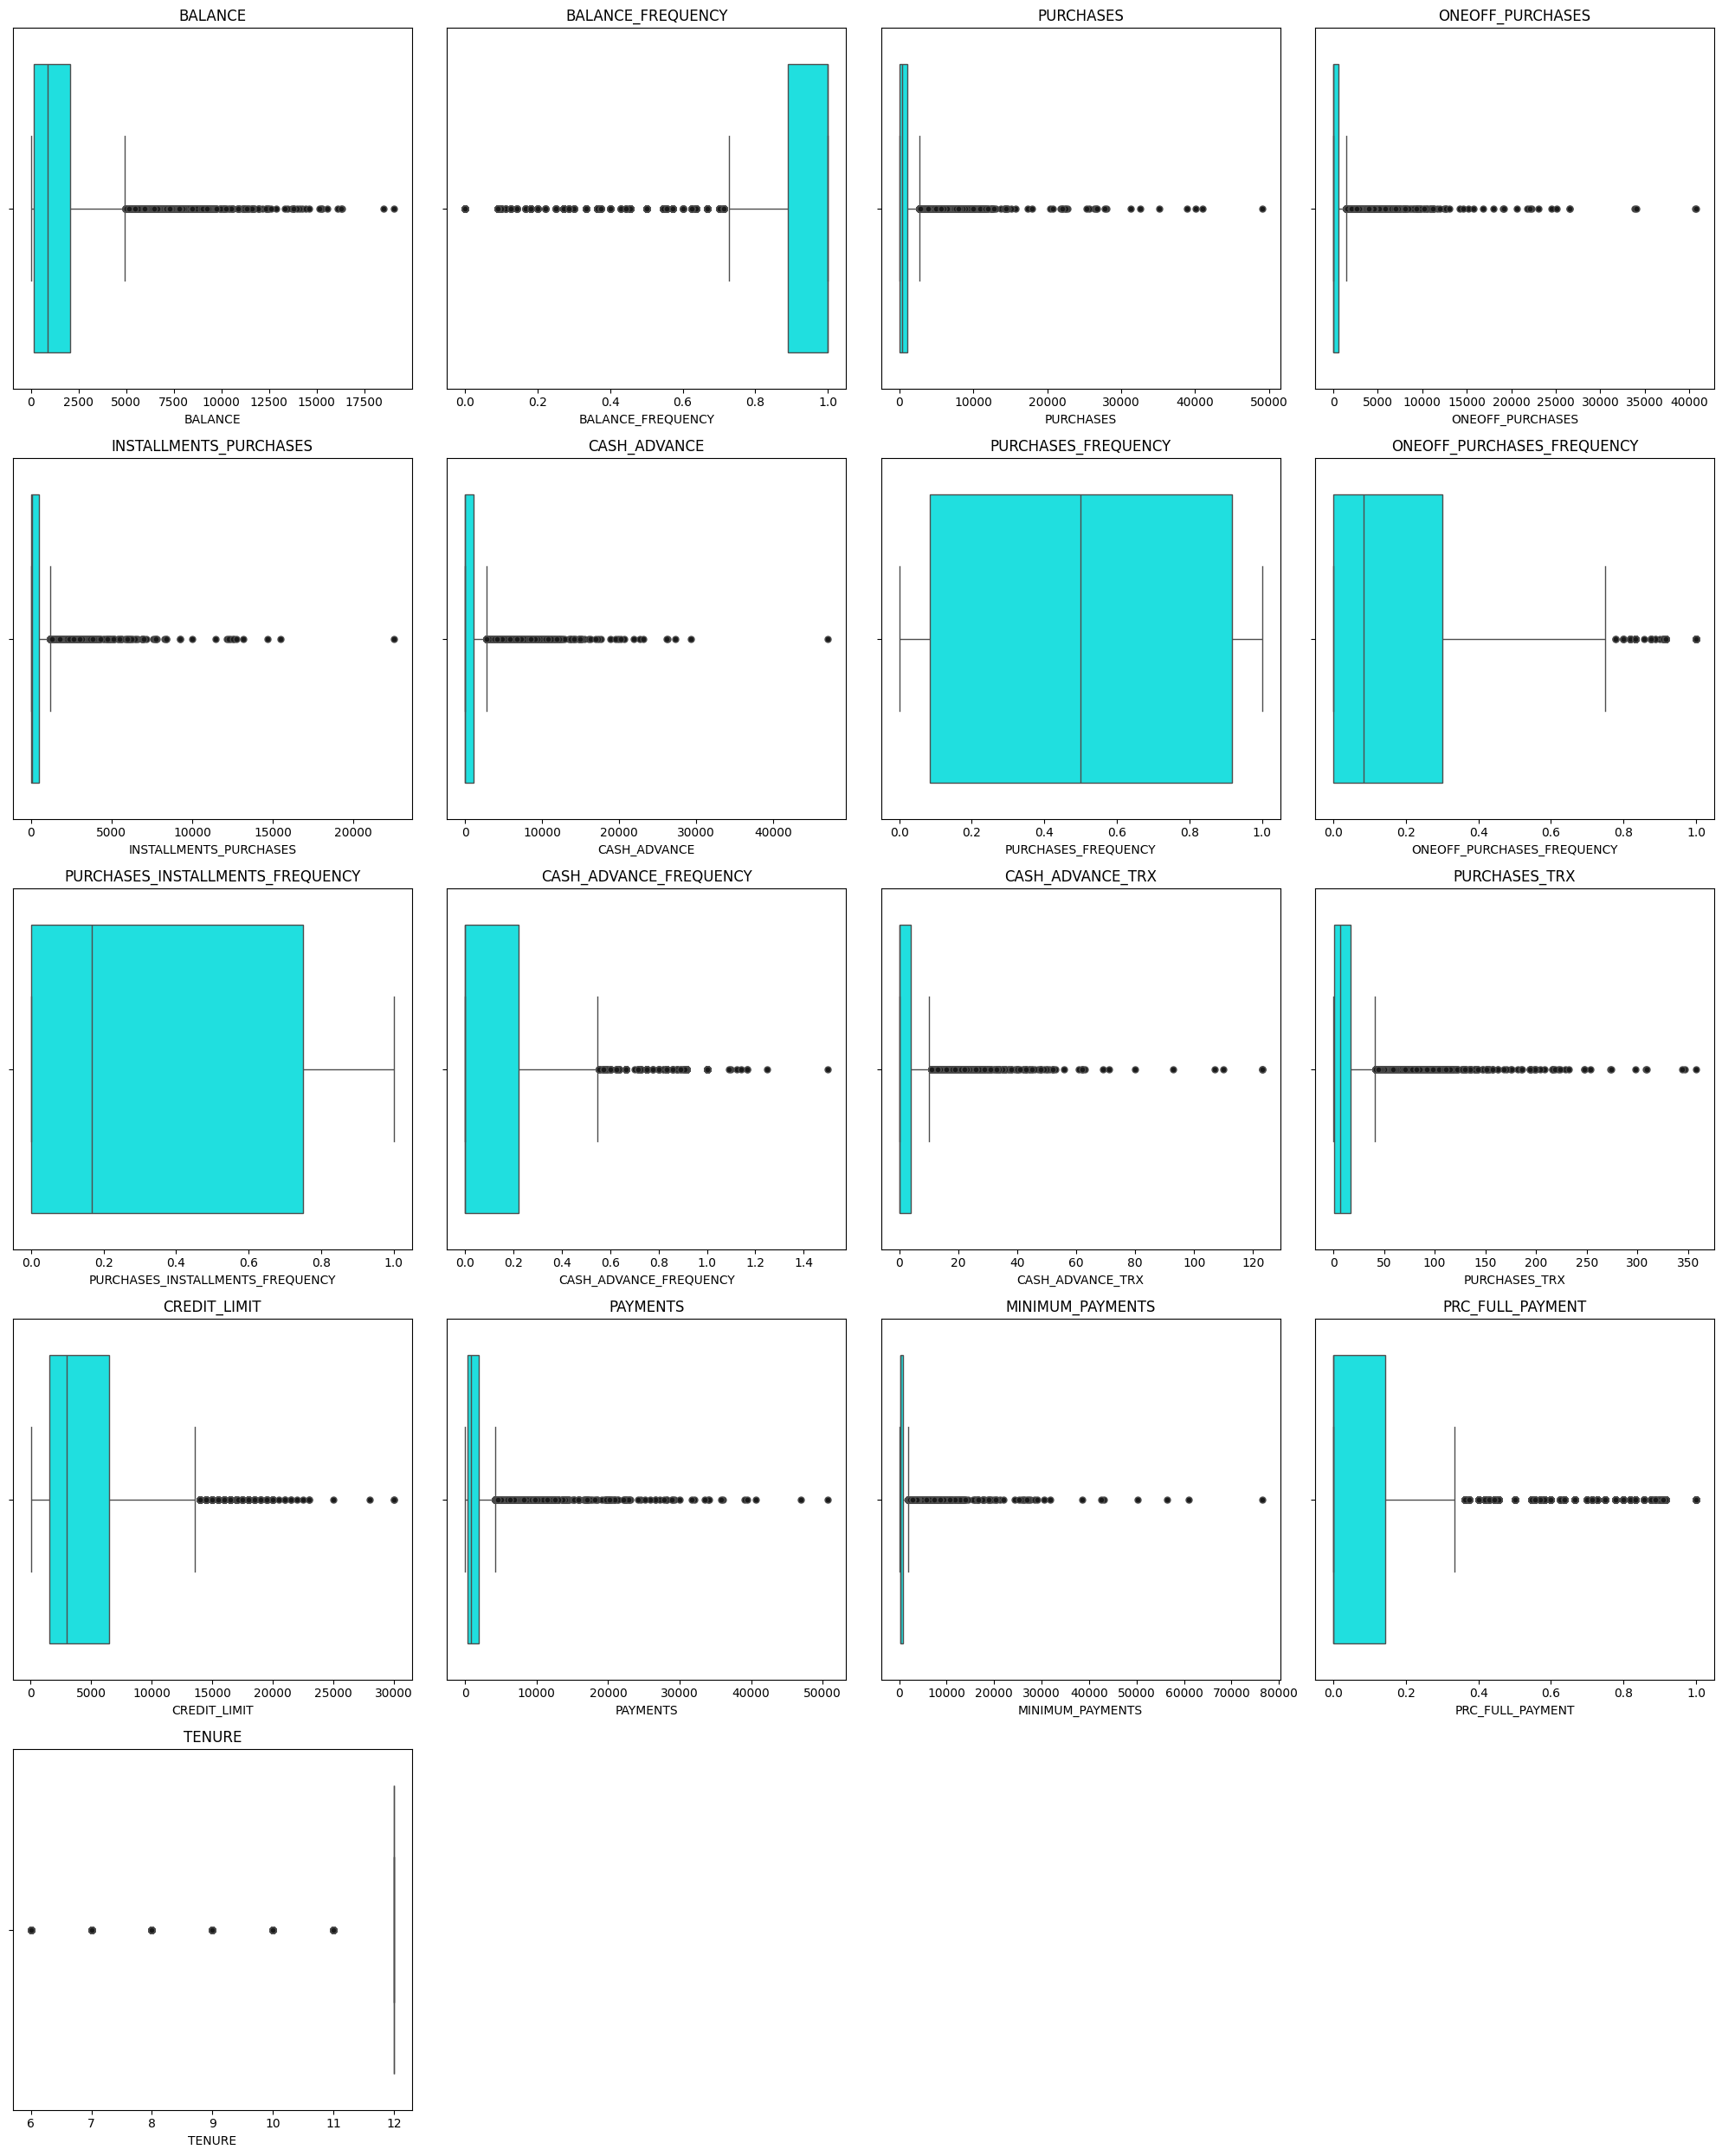

In [ ]:
# Calculate the number of rows and columns needed for subplots
num_cols = len(data.columns)
rows = (num_cols + 3) // 4  # Ceiling division to determine number of rows

# Create subplots
plt.figure(figsize=(20, 5 * rows))

# Plot boxplots
for i, column in enumerate(data.columns, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=data[column], color='aqua',
                flierprops=dict(markerfacecolor='0.10', markersize=5))
    plt.title(column)
    plt.tight_layout()

plt.show()

# Handleing the Outliers Using the IQR Method

In [ ]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype != 'object':  # Ensure the column is numeric
            Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers to the lower and upper bounds
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply the function to your dataset
handle_outliers_iqr(data)


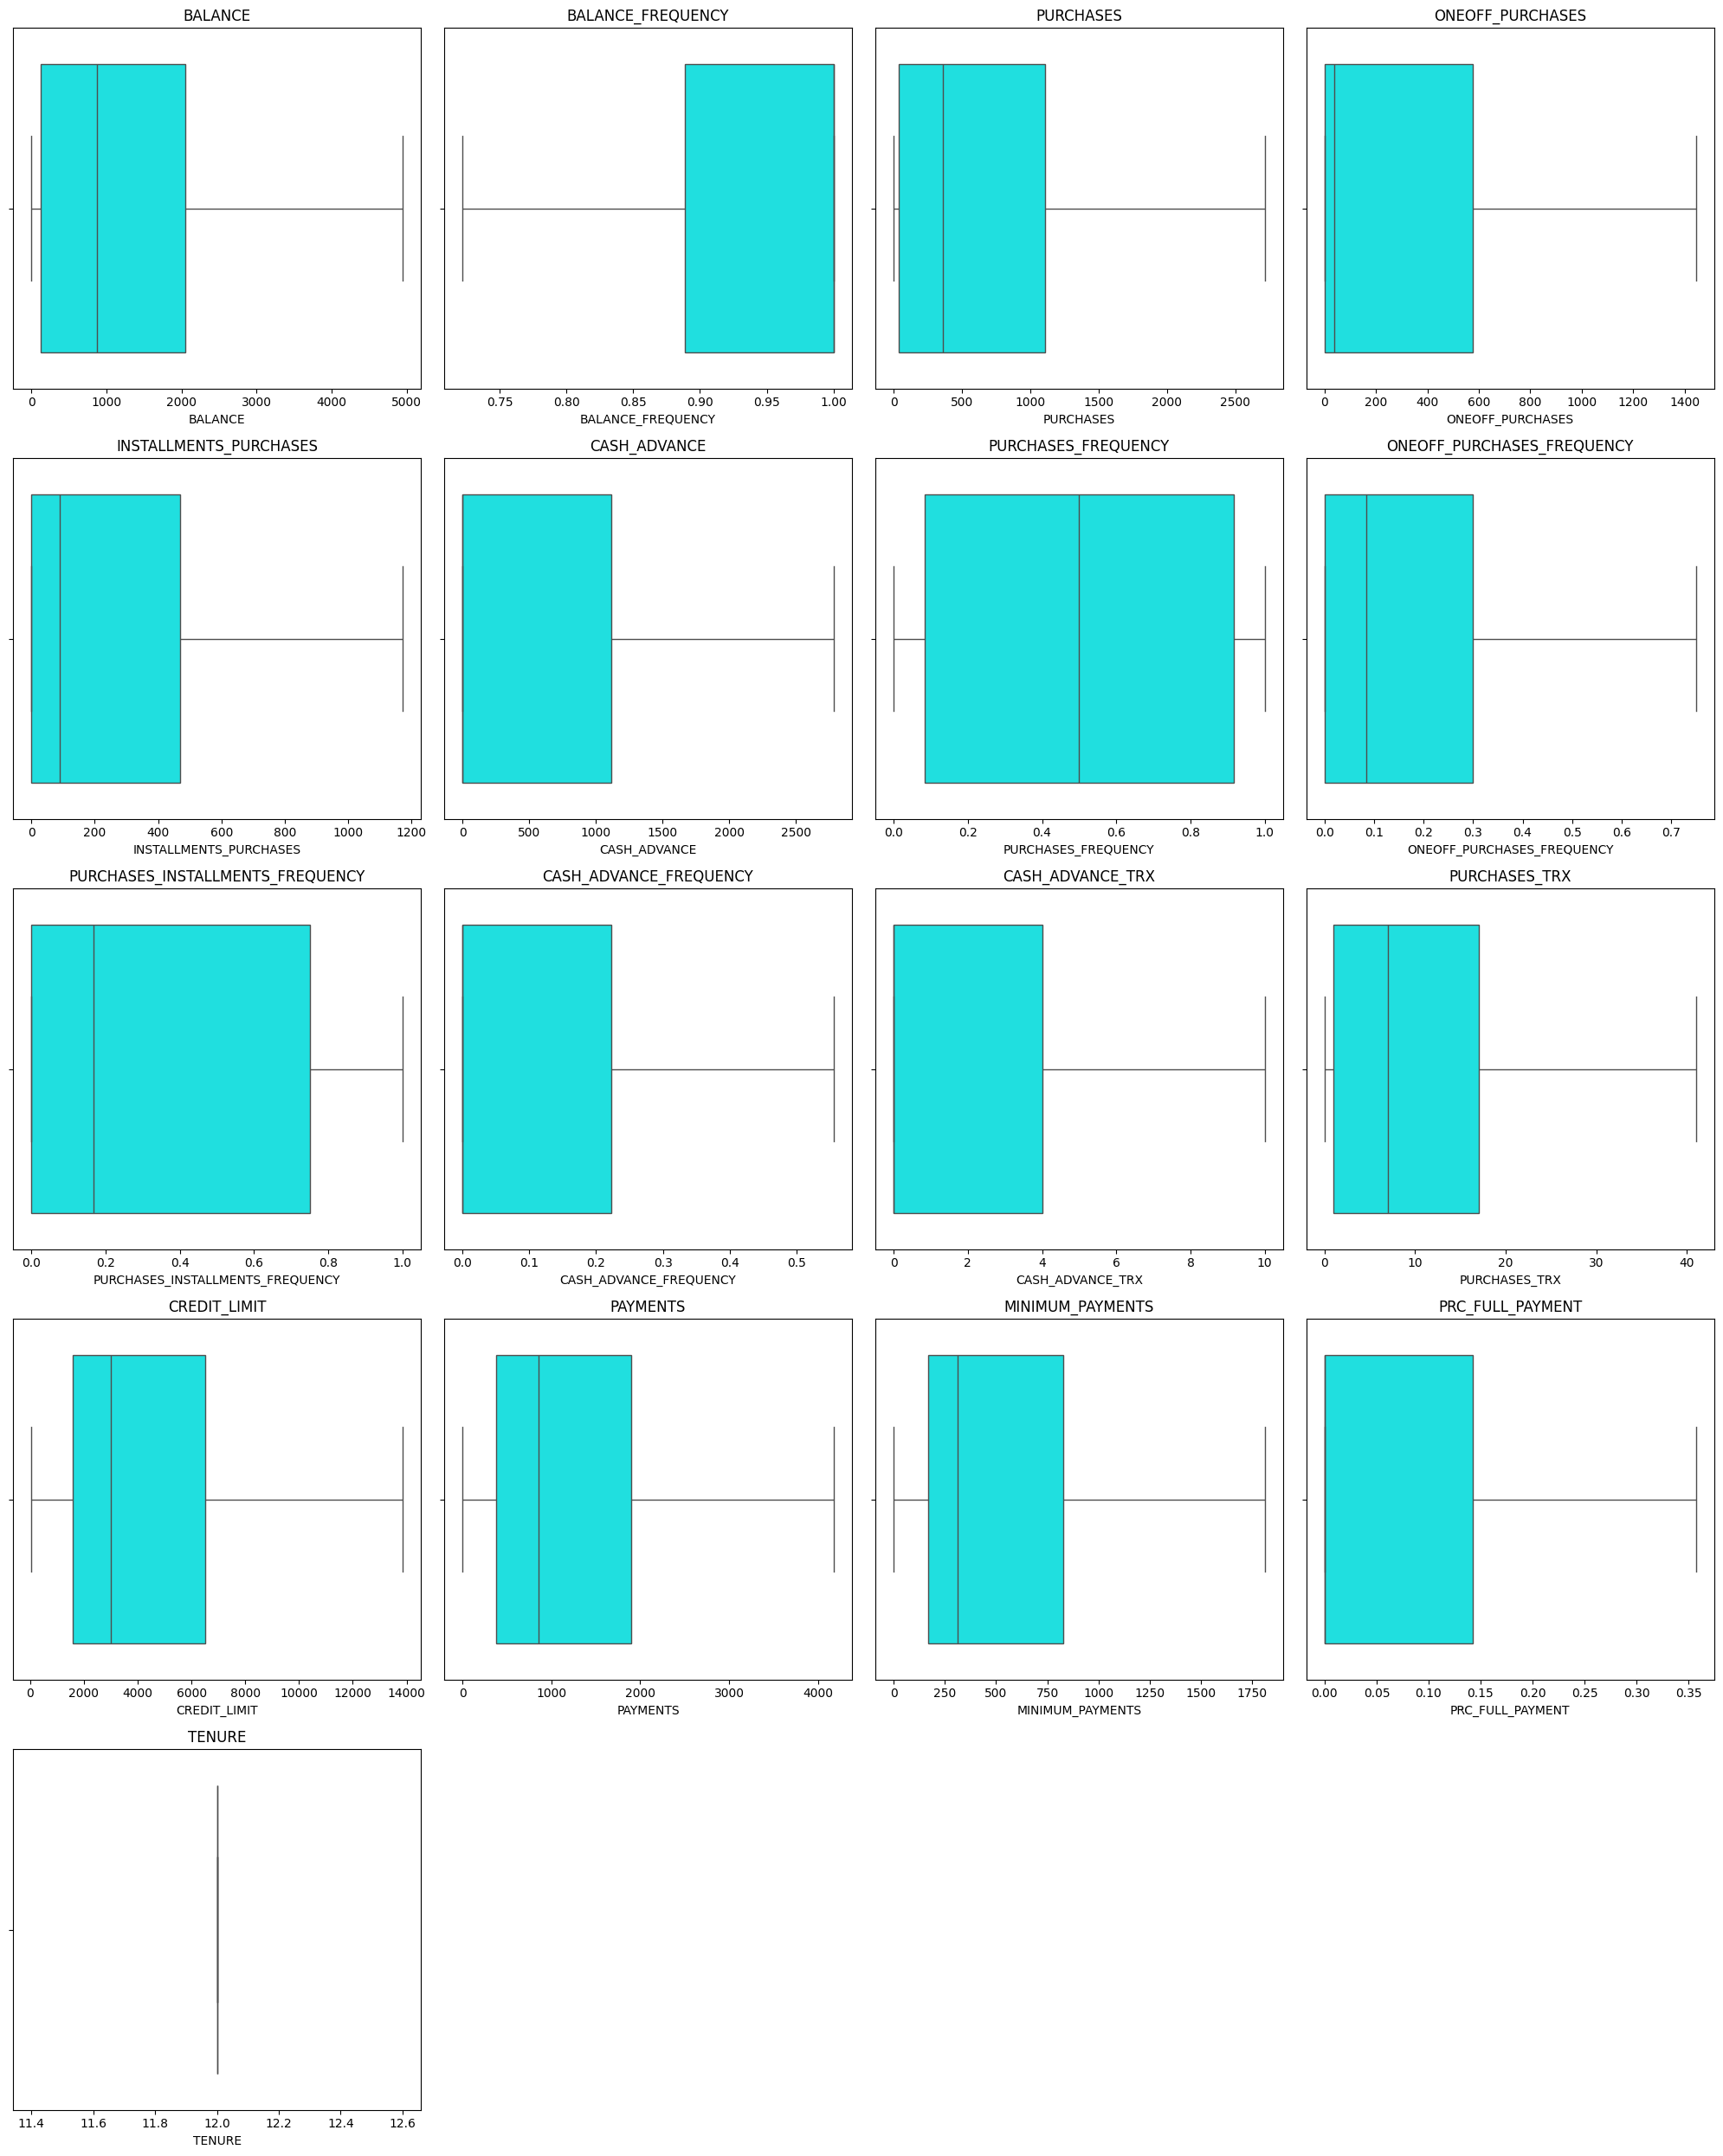

In [ ]:
# Re-plot boxplots to visualize the data after handling outliers
num_cols = len(data.columns)
rows = (num_cols + 3) // 4  # Ceiling division to determine number of rows

# Create subplots
plt.figure(figsize=(20, 5 * rows))

# Plot boxplots
for i, column in enumerate(data.columns, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=data[column], color='aqua',
                flierprops=dict(markerfacecolor='0.10', markersize=5))
    plt.title(column)
    plt.tight_layout()

plt.show()


In [ ]:
data.shape

(8950, 17)

# Handle missing data

In [ ]:

# Fill missing values in MINIMUM_PAYMENTS with the median
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

# Fill missing value in CREDIT_LIMIT with the mean
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Verify that there are no missing values left
print(data.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


<ipython-input-18-e0c1b4d2ee74>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
<ipython-input-18-e0c1b4d2ee74>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

# Standrizing The Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the data (excluding CUST_ID which has already been removed)
standardized_data = scaler.fit_transform(data)

# Convert the standardized data back to a DataFrame for easier interpretation
standardized_df = pd.DataFrame(standardized_data, columns=data.columns)

# Display the first few rows of the standardized data
#print(standardized_df.head())
standardized_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010560,-0.899859,-0.771797,-0.629277,0.0
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762717,2.165375,0.916407,0.973961,0.0
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910490,-0.569653,0.110961,-0.629277,0.0
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910490,-1.058417,-0.459008,-0.629277,0.0
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951450,-0.525443,-0.581262,-0.629277,0.0


# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(standardized_df)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans_labels

# Display the first few rows with cluster labels
#print(data.head())
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1


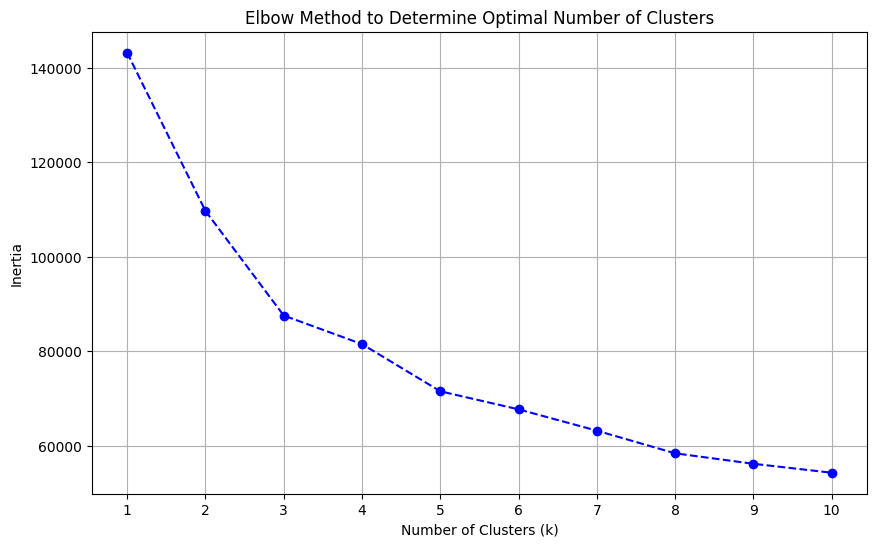

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia_values = []  # List to store the inertia for each value of k
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_df)
    inertia_values.append(kmeans.inertia_)  # Append the inertia (sum of squared distances)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [ ]:
# Reapply K-means with the optimal number of clusters
optimal_clusters = 6                                              # ******************RReplace with the value from the elbow graph******************
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = kmeans_final.fit_predict(standardized_df)

# Add the final cluster labels to the original DataFrame
data['Final_Cluster'] = final_labels

# Display the first few rows with the final cluster labels
#print(data.head())
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Final_Cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1,1
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3,3
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2,2
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1,1
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1,1


In [ ]:
# Dunn Index Calculation
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            points_i = X[labels == unique_labels[i]]
            points_j = X[labels == unique_labels[j]]
            dist = cdist(points_i, points_j, metric='euclidean')
            min_inter_cluster_dist = min(min_inter_cluster_dist, np.min(dist))

        points_i = X[labels == unique_labels[i]]
        intra_dist = cdist(points_i, points_i, metric='euclidean')
        if len(intra_dist) > 0:
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_dist))

    return min_inter_cluster_dist / max_intra_cluster_dist


In [ ]:

# Calculate Silhouette Coefficient for the clustering
silhouette_avg = silhouette_score(standardized_df, data['Final_Cluster'])

# Display the Silhouette Coefficient
print(f"Silhouette Coefficient for K-means clustering: {silhouette_avg:.3f}")

# Dunn Index
dunn_index_KMeans = dunn_index(standardized_df.values, data['Final_Cluster'])
print(f"Dunn Index for K-means Clustering: {dunn_index_KMeans}")


Silhouette Coefficient for K-means clustering: 0.197
Dunn Index for K-means Clustering: 0.023023845713158686


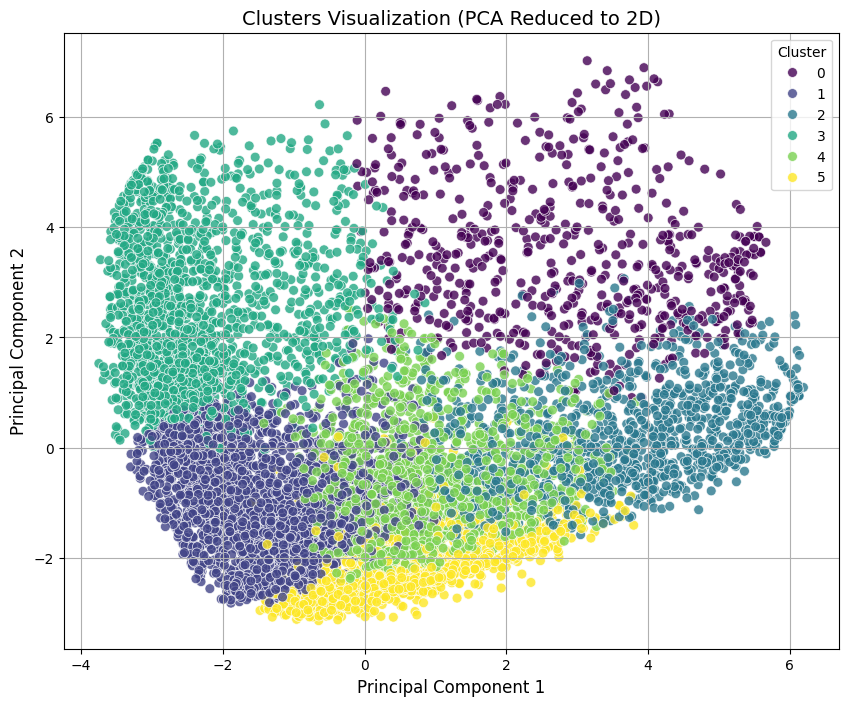

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_df)

# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = data['Final_Cluster']  # Add cluster labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=reduced_df,
    s=50,
    alpha=0.8
)
plt.title('Clusters Visualization (PCA Reduced to 2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [ ]:

# Calculate Silhouette Coefficient for the clustering
silhouette_avg = silhouette_score(reduced_df, data['Final_Cluster'])

# Display the Silhouette Coefficient
print(f"Silhouette Coefficient for K-means Clustering after PCA: {silhouette_avg:.3f}")

# Dunn Index
dunn_index_KMeans = dunn_index(reduced_df.values, data['Final_Cluster'])
print(f"Dunn Index for K-means Clustering after PCA: {dunn_index_KMeans}")


Silhouette Coefficient for K-means Clustering after PCA: 0.264
Dunn Index for K-means Clustering after PCA: 0.00022345744917193197


In [ ]:
# from scipy.spatial.distance import cdist
# import numpy as np

# def calculate_dunn_index(data, labels):
#     """
#     Calculates the Dunn Index for the given clustering.

#     Parameters:
#         data (ndarray): Standardized feature data (NumPy array).
#         labels (ndarray): Cluster labels (NumPy array).

#     Returns:
#         dunn_index (float): Computed Dunn Index.
#     """
#     unique_clusters = np.unique(labels)
#     cluster_centers = [data[labels == k] for k in unique_clusters]

#     # Calculate intra-cluster distances (largest distance within each cluster)
#     intra_cluster_distances = [
#         np.max(cdist(cluster, cluster)) if len(cluster) > 1 else 0
#         for cluster in cluster_centers
#     ]

#     # Calculate inter-cluster distances (smallest distance between cluster centers)
#     inter_cluster_distances = np.min([
#         cdist(cluster_centers[i], cluster_centers[j]).min()
#         for i in range(len(cluster_centers))
#         for j in range(len(cluster_centers))
#         if i != j
#     ])

#     # Compute Dunn Index
#     dunn_index = inter_cluster_distances / np.max(intra_cluster_distances)
#     return dunn_index

# # Calculate Dunn Index
# dunn_index = calculate_dunn_index(standardized_df.values, data['Final_Cluster'].values)
# print(f"Dunn Index for K-means clustering (n_clusters=4): {dunn_index:.3f}")


Dunn Index for K-means clustering (n_clusters=4): 0.023


# Heirerical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Apply Agglomerative Clustering (without the affinity argument)
agg_clust = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Agglomerative_Cluster'] = agg_clust.fit_predict(standardized_df)

# Display the first few rows to confirm clustering
#print(data[['Agglomerative_Cluster']].head())
data[['Agglomerative_Cluster']].head()

,Agglomerative_Cluster
0,1
1,2
2,1
3,1
4,1


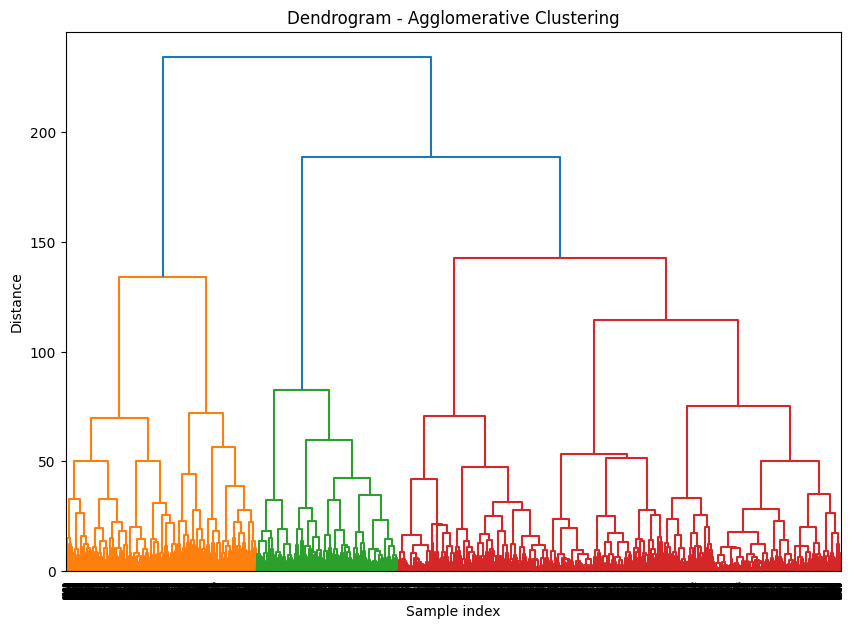

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering using linkage
Z = linkage(standardized_df, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.spatial.distance import cdist

# 1. Silhouette Coefficient
sil_score = silhouette_score(standardized_df, data['Agglomerative_Cluster'])
print(f"Silhouette Coefficient for Agglomerative Clustering (n_clusters=4): {sil_score}")

# 2. Dunn Index
def dunn_index(X, labels):
    # Get the unique cluster labels
    unique_labels = np.unique(labels)

    # Initialize variables for minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    # Iterate over each pair of clusters
    for i in range(len(unique_labels)):
        for j in range(i+1, len(unique_labels)):
            # Get the points belonging to cluster i and j
            points_i = X[labels == unique_labels[i]]
            points_j = X[labels == unique_labels[j]]

            # Calculate the inter-cluster distance (distance between points in different clusters)
            dist = cdist(points_i, points_j, 'euclidean')
            min_inter_cluster_dist = min(min_inter_cluster_dist, np.min(dist))

        # Calculate the intra-cluster distance (distance within the same cluster)
        for i in range(len(unique_labels)):
            points_i = X[labels == unique_labels[i]]
            dist = cdist(points_i, points_i, 'euclidean')
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(dist))

    # Compute the Dunn Index
    dunn_index_value = min_inter_cluster_dist / max_intra_cluster_dist
    return dunn_index_value

# Calculate the Dunn Index for the Agglomerative Clustering
dunn_index_value = dunn_index(standardized_df.values, data['Agglomerative_Cluster'])
print(f"Dunn Index for Agglomerative Clustering (n_clusters=4): {dunn_index_value}")


Silhouette Coefficient for Agglomerative Clustering (n_clusters=4): 0.14064321181057626
Dunn Index for Agglomerative Clustering (n_clusters=4): 0.03158532172201175


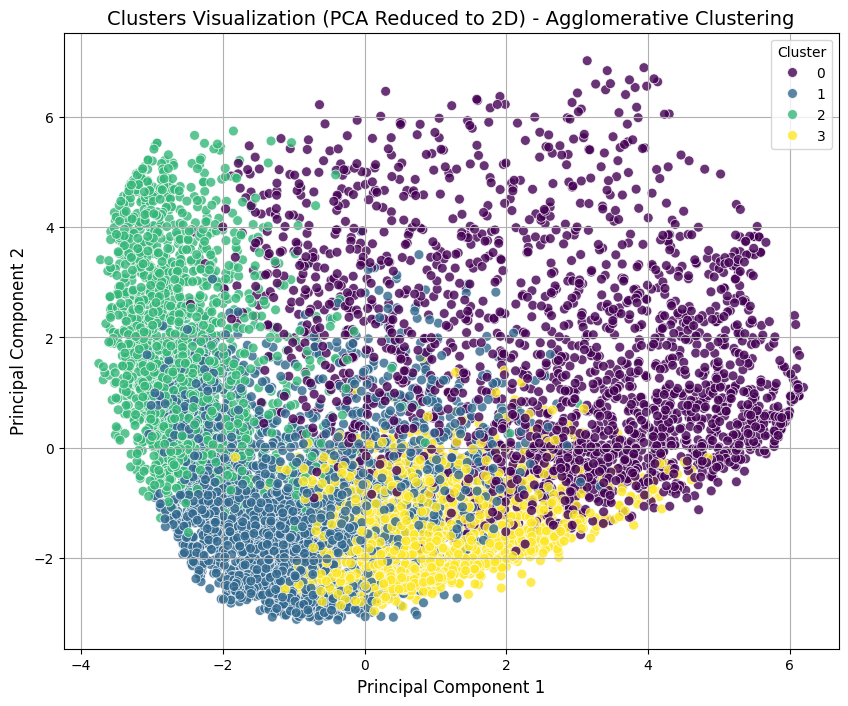

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_df)

# Add the cluster labels to the PCA-reduced data for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['Agglomerative_Cluster'] = data['Agglomerative_Cluster']

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Agglomerative_Cluster',
    palette='viridis',
    data=reduced_df,
    s=50,
    alpha=0.8
)
plt.title('Clusters Visualization (PCA Reduced to 2D) - Agglomerative Clustering', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Coefficient After PCA
sil_score_pca = silhouette_score(reduced_data, data['Agglomerative_Cluster'])
print(f"Silhouette Coefficient after PCA (Hierarchical Clustering): {sil_score_pca}")

# Dunn Index After PCA
dunn_index_pca = dunn_index(reduced_data, data['Agglomerative_Cluster'])
print(f"Dunn Index after PCA (Hierarchical Clustering): {dunn_index_pca}")


Silhouette Coefficient after PCA (Hierarchical Clustering): 0.17474658600869222
Dunn Index after PCA (Hierarchical Clustering): 0.00019650436330111043


# Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.spatial.distance import cdist

# Apply Spectral Clustering
spectral_clust = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral_clust.fit_predict(standardized_df)

# Display the first few rows to confirm clustering
# print(data[['Spectral_Cluster']].head())
data[['Spectral_Cluster']].head()

,Spectral_Cluster
0,1
1,0
2,2
3,1
4,0


In [ ]:
# Silhouette Coefficient
sil_score_spectral = silhouette_score(standardized_df, data['Spectral_Cluster'])
print(f"Silhouette Coefficient for Spectral Clustering (n_clusters=4): {sil_score_spectral}")

# Dunn Index
dunn_index_spectral = dunn_index(standardized_df.values, data['Spectral_Cluster'])
print(f"Dunn Index for Spectral Clustering (n_clusters=4): {dunn_index_spectral}")


Silhouette Coefficient for Spectral Clustering (n_clusters=4): 0.13480927323064243
Dunn Index for Spectral Clustering (n_clusters=4): 0.03154025315791787


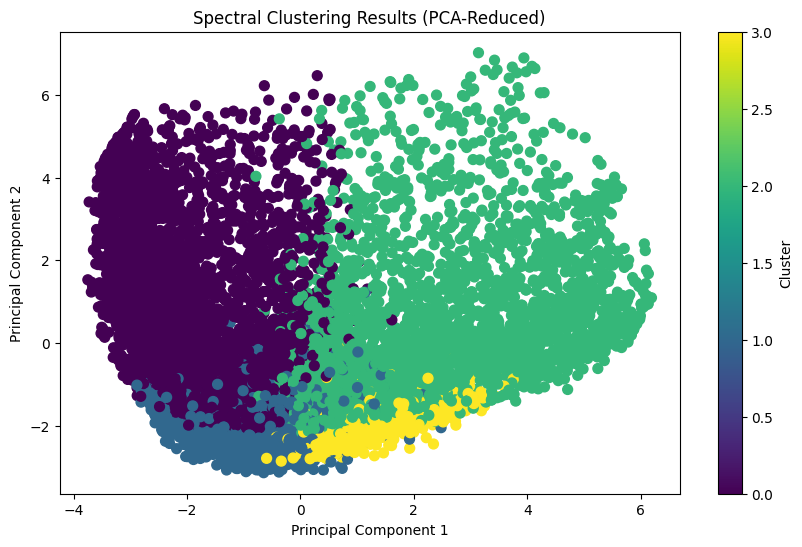

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(standardized_df)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Spectral_Cluster'], cmap='viridis', s=50)
plt.title('Spectral Clustering Results (PCA-Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
# Silhouette Coefficient After PCA
sil_score_pca = silhouette_score(data_pca, data['Spectral_Cluster'])
print(f"Silhouette Coefficient after PCA (Spectral Clustering, n_clusters=4): {sil_score_pca}")

# Dunn Index After PCA
dunn_index_pca = dunn_index(data_pca, data['Spectral_Cluster'])
print(f"Dunn Index after PCA (Spectral Clustering, n_clusters=4): {dunn_index_pca}")


Silhouette Coefficient after PCA (Spectral Clustering, n_clusters=4): 0.13620114773402175
Dunn Index after PCA (Spectral Clustering, n_clusters=4): 0.0001520560615864102


### **Understanding the Metrics**

1. **Silhouette Coefficient**:
   - **Range**: \[-1, 1\]
   - **Interpretation**:
     - **Closer to 1**: Good clustering, with well-separated clusters and tight intra-cluster cohesion.
     - **Near 0**: Overlapping clusters.
     - **Negative values**: Poor clustering with misplaced samples.
   - A value above **0.5** is generally considered good, while values below **0.25** indicate poor clustering.

2. **Dunn Index**:
   - **Higher values are better**.
   - Indicates well-separated clusters (large inter-cluster distance) and compact clusters (small intra-cluster distance).
   - A **low value** indicates poor separation and cohesion.
   - There is no fixed threshold, but relative comparison across algorithms is crucial.

---

### **Brief Explanation of Results**
#### 1. **K-means Clustering**:
   - **Without PCA**:
     - Silhouette Coefficient: **0.197** (low, indicating poor separation).
     - Dunn Index: **0.023** (relatively low, but better than some others).
   - **With PCA**:
     - Silhouette Coefficient: **0.264** (higher after PCA but still low).
     - Dunn Index: **0.00022** (much worse after PCA, indicating poor separation).

#### 2. **Agglomerative Clustering**:
   - **Without PCA**:
     - Silhouette Coefficient: **0.141** (low).
     - Dunn Index: **0.032** (slightly better than K-means).
   - **With PCA**:
     - Silhouette Coefficient: **0.175** (slightly better than without PCA but still low).
     - Dunn Index: **0.00019** (worse after PCA).

#### 3. **Spectral Clustering**:
   - **Without PCA**:
     - Silhouette Coefficient: **0.135** (very low).
     - Dunn Index: **0.0315** (similar to Agglomerative Clustering).
   - **With PCA**:
     - Silhouette Coefficient: **0.136** (no significant improvement).
     - Dunn Index: **0.00015** (worse after PCA).

---

### **Conclusions**

 **Best Algorithm**:
   - Based on **Silhouette Coefficient**:
     - **K-means Clustering after PCA (0.264)** performed the best.
   - Based on **Dunn Index**:
     - **Agglomerative Clustering without PCA (0.032)** achieved the best score.
   - Overall, **K-means Clustering after PCA** seems marginally better since the Silhouette Coefficient is more widely used and interpretable.



_____________________________________________________
# Another Approach With better Results 🦾💯


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
#from sklearn.metrics.pairwise import cosine_similarity

## Getting to know with the data

In [ ]:
data2= pd.read_csv("/content/drive/MyDrive/Dataset/CC GENERAL.csv")
# print(data.shape)
# data.head()
dff = pd.DataFrame(data2)
dff.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
dff.shape

(8950, 18)

In [ ]:
dff.isnull().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
CUST_ID,0
BALANCE,0
PRC_FULL_PAYMENT,0
PAYMENTS,0
PURCHASES_TRX,0
CASH_ADVANCE_TRX,0
CASH_ADVANCE_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
dff.duplicated().sum()

0

In [ ]:
dff.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
dff.shape

(8950, 17)

In [ ]:
dff.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Preprocessing
Plotting Box plot to investigate the outliers for each feature

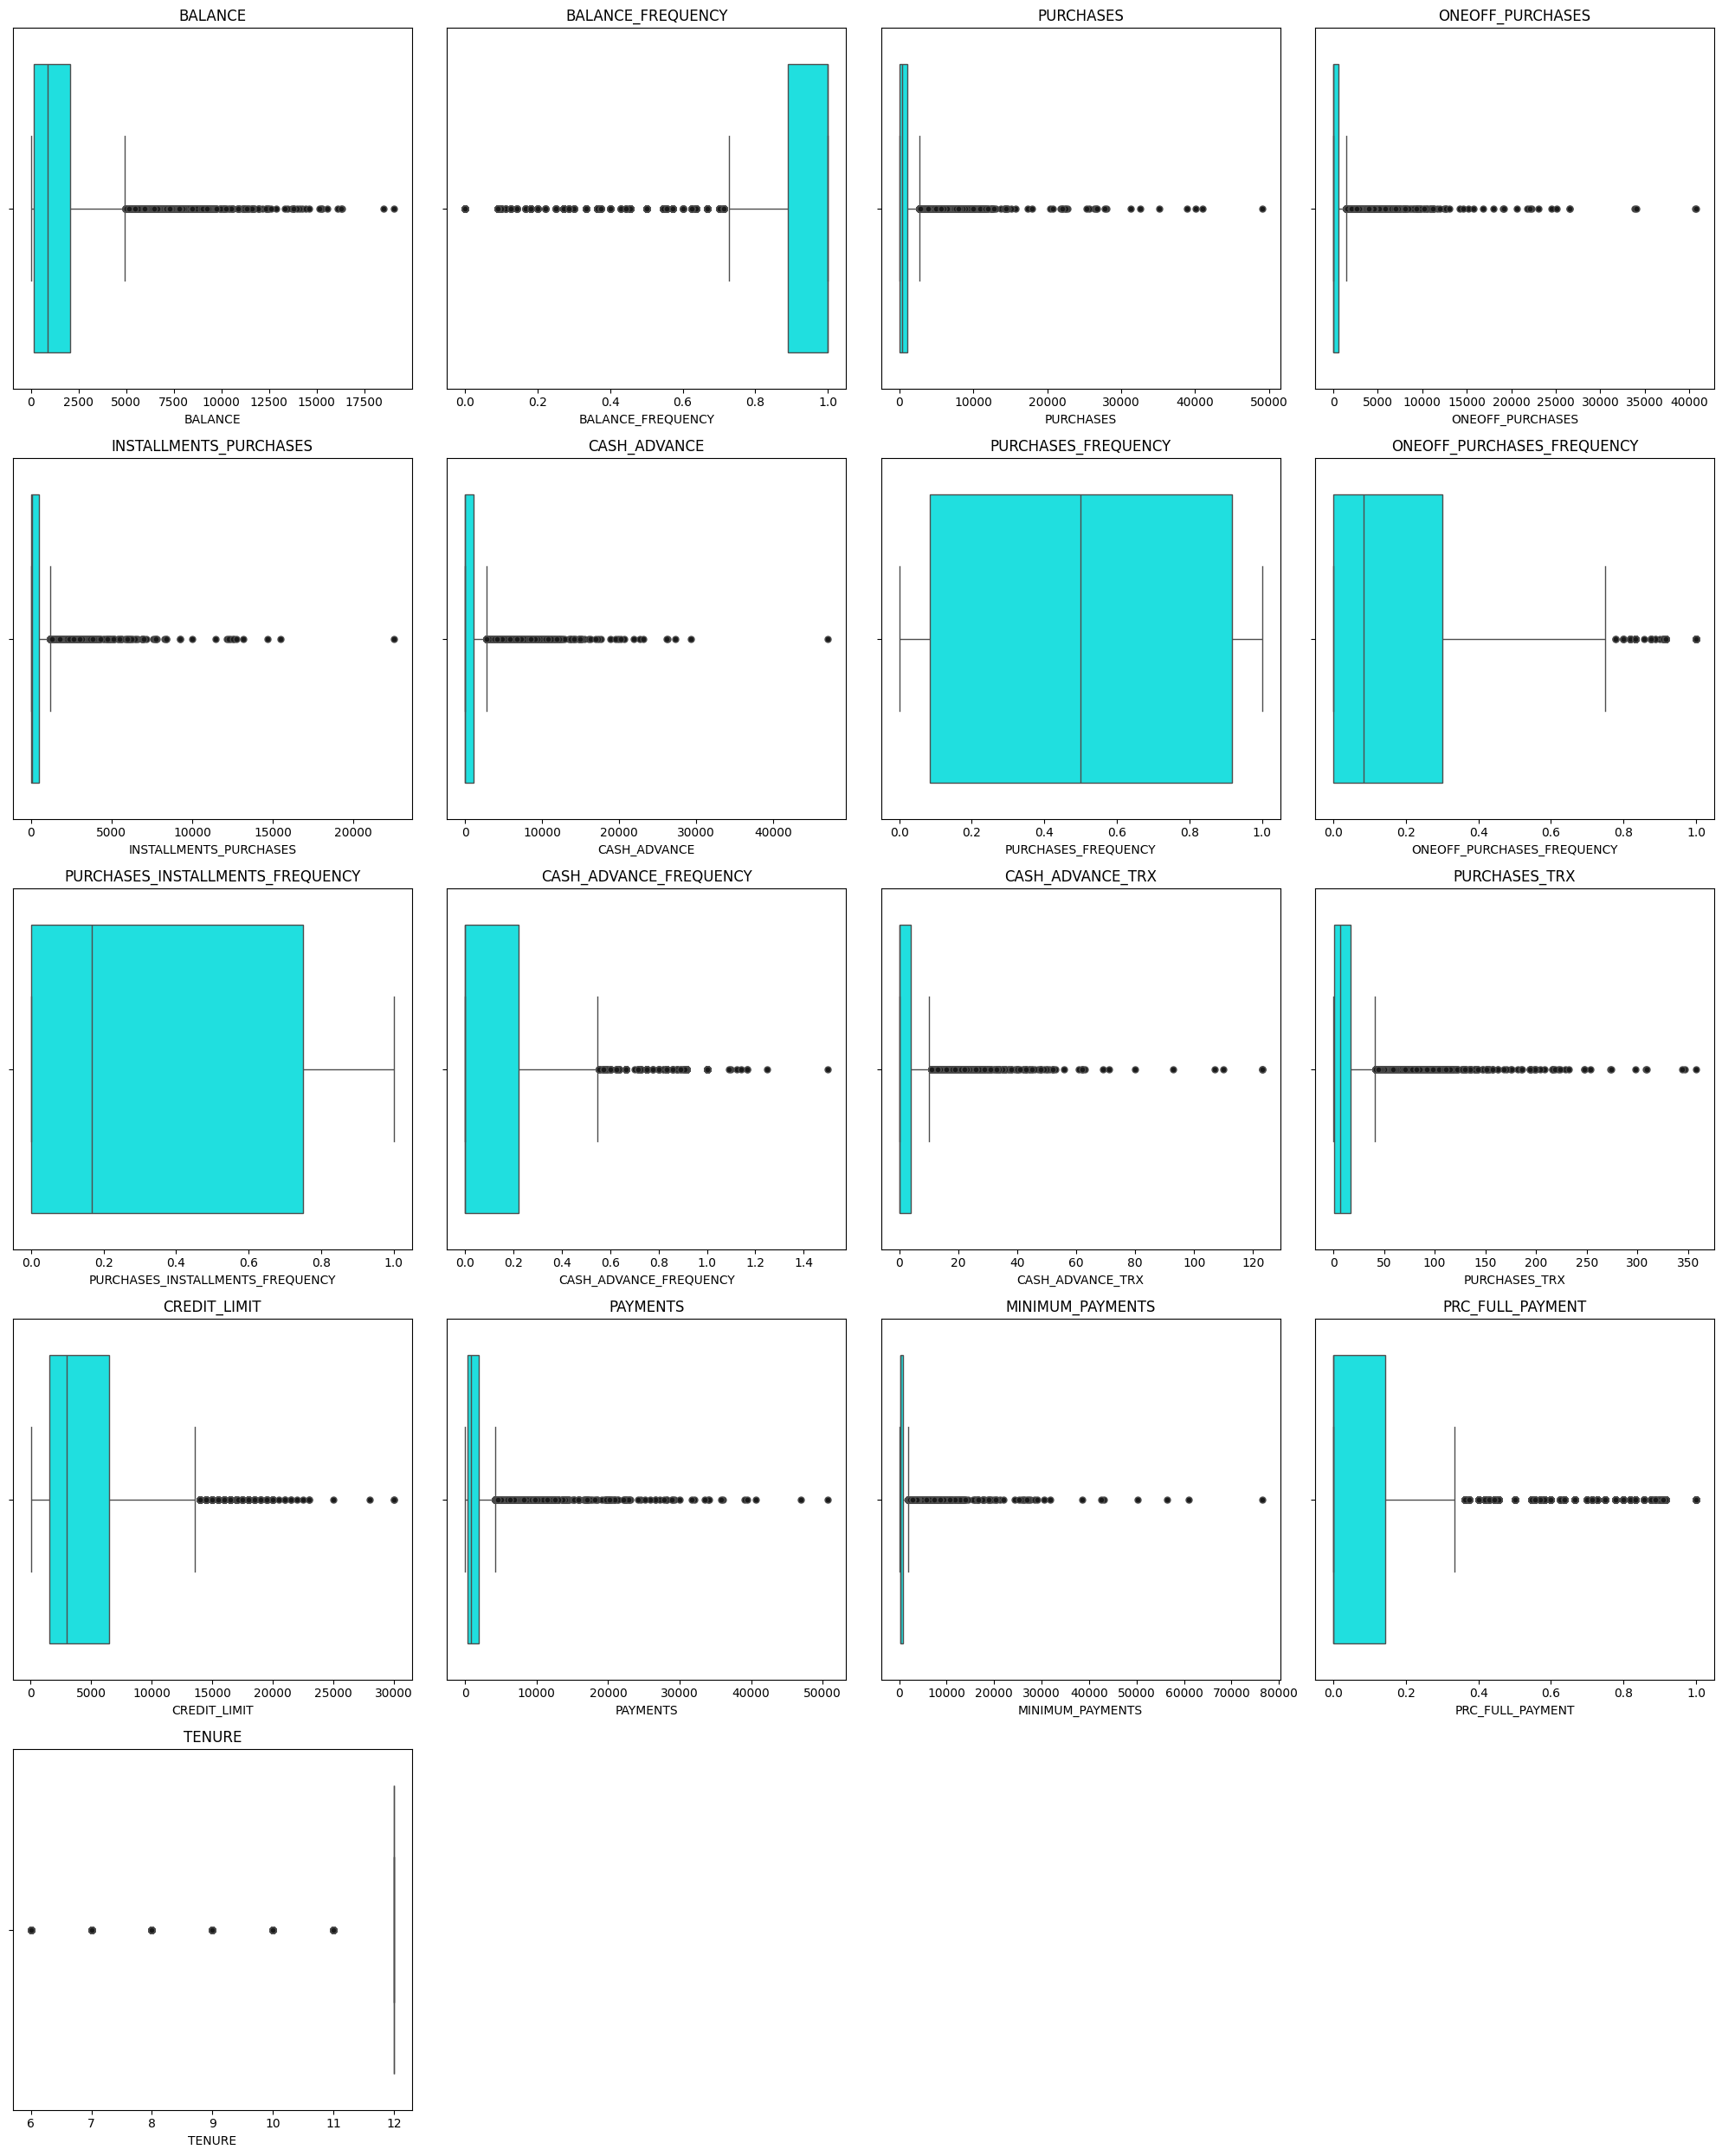

In [ ]:
# Calculate the number of rows and columns needed for subplots
num_cols = len(data2.columns)
rows = (num_cols + 3) // 4  # Ceiling division to determine number of rows

# Create subplots
plt.figure(figsize=(20, 5 * rows))

# Plot boxplots
for i, column in enumerate(data2.columns, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=data2[column], color='aqua',
                flierprops=dict(markerfacecolor='0.10', markersize=5))
    plt.title(column)
    plt.tight_layout()

plt.show()


### Handling Missing Data with KNN Imputation

Missing data can impact model performance. To address this, we used **KNN Imputation** with `n_neighbors=5` to fill missing values by averaging the nearest neighbors based on Euclidean distance. This ensures the dataset is complete and ready for further analysis.

In [ ]:
from sklearn.impute import KNNImputer

# Create a KNNImputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
imputed_data = knn_imputer.fit_transform(dff)

# Convert the imputed data back to a DataFrame
dff_imputed = pd.DataFrame(imputed_data, columns=dff.columns)

# Check for remaining missing values
print(dff_imputed.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


### Handling Outliers Using the IQR Method
Outliers can distort analysis and model performance. To address this, the IQR method was applied to detect outliers in each column. Values falling outside 1.5 times the interquartile range (IQR) from the first (Q1) and third quartiles (Q3) were identified as outliers. These outliers were replaced with the column median to maintain data consistency without introducing bias.

In [ ]:
# Detect and handle outliers using the IQR method
for column in dff_imputed.columns:
    Q1 = dff_imputed[column].quantile(0.25)
    Q3 = dff_imputed[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = dff_imputed[column].median()
    dff_imputed[column] = dff_imputed[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )


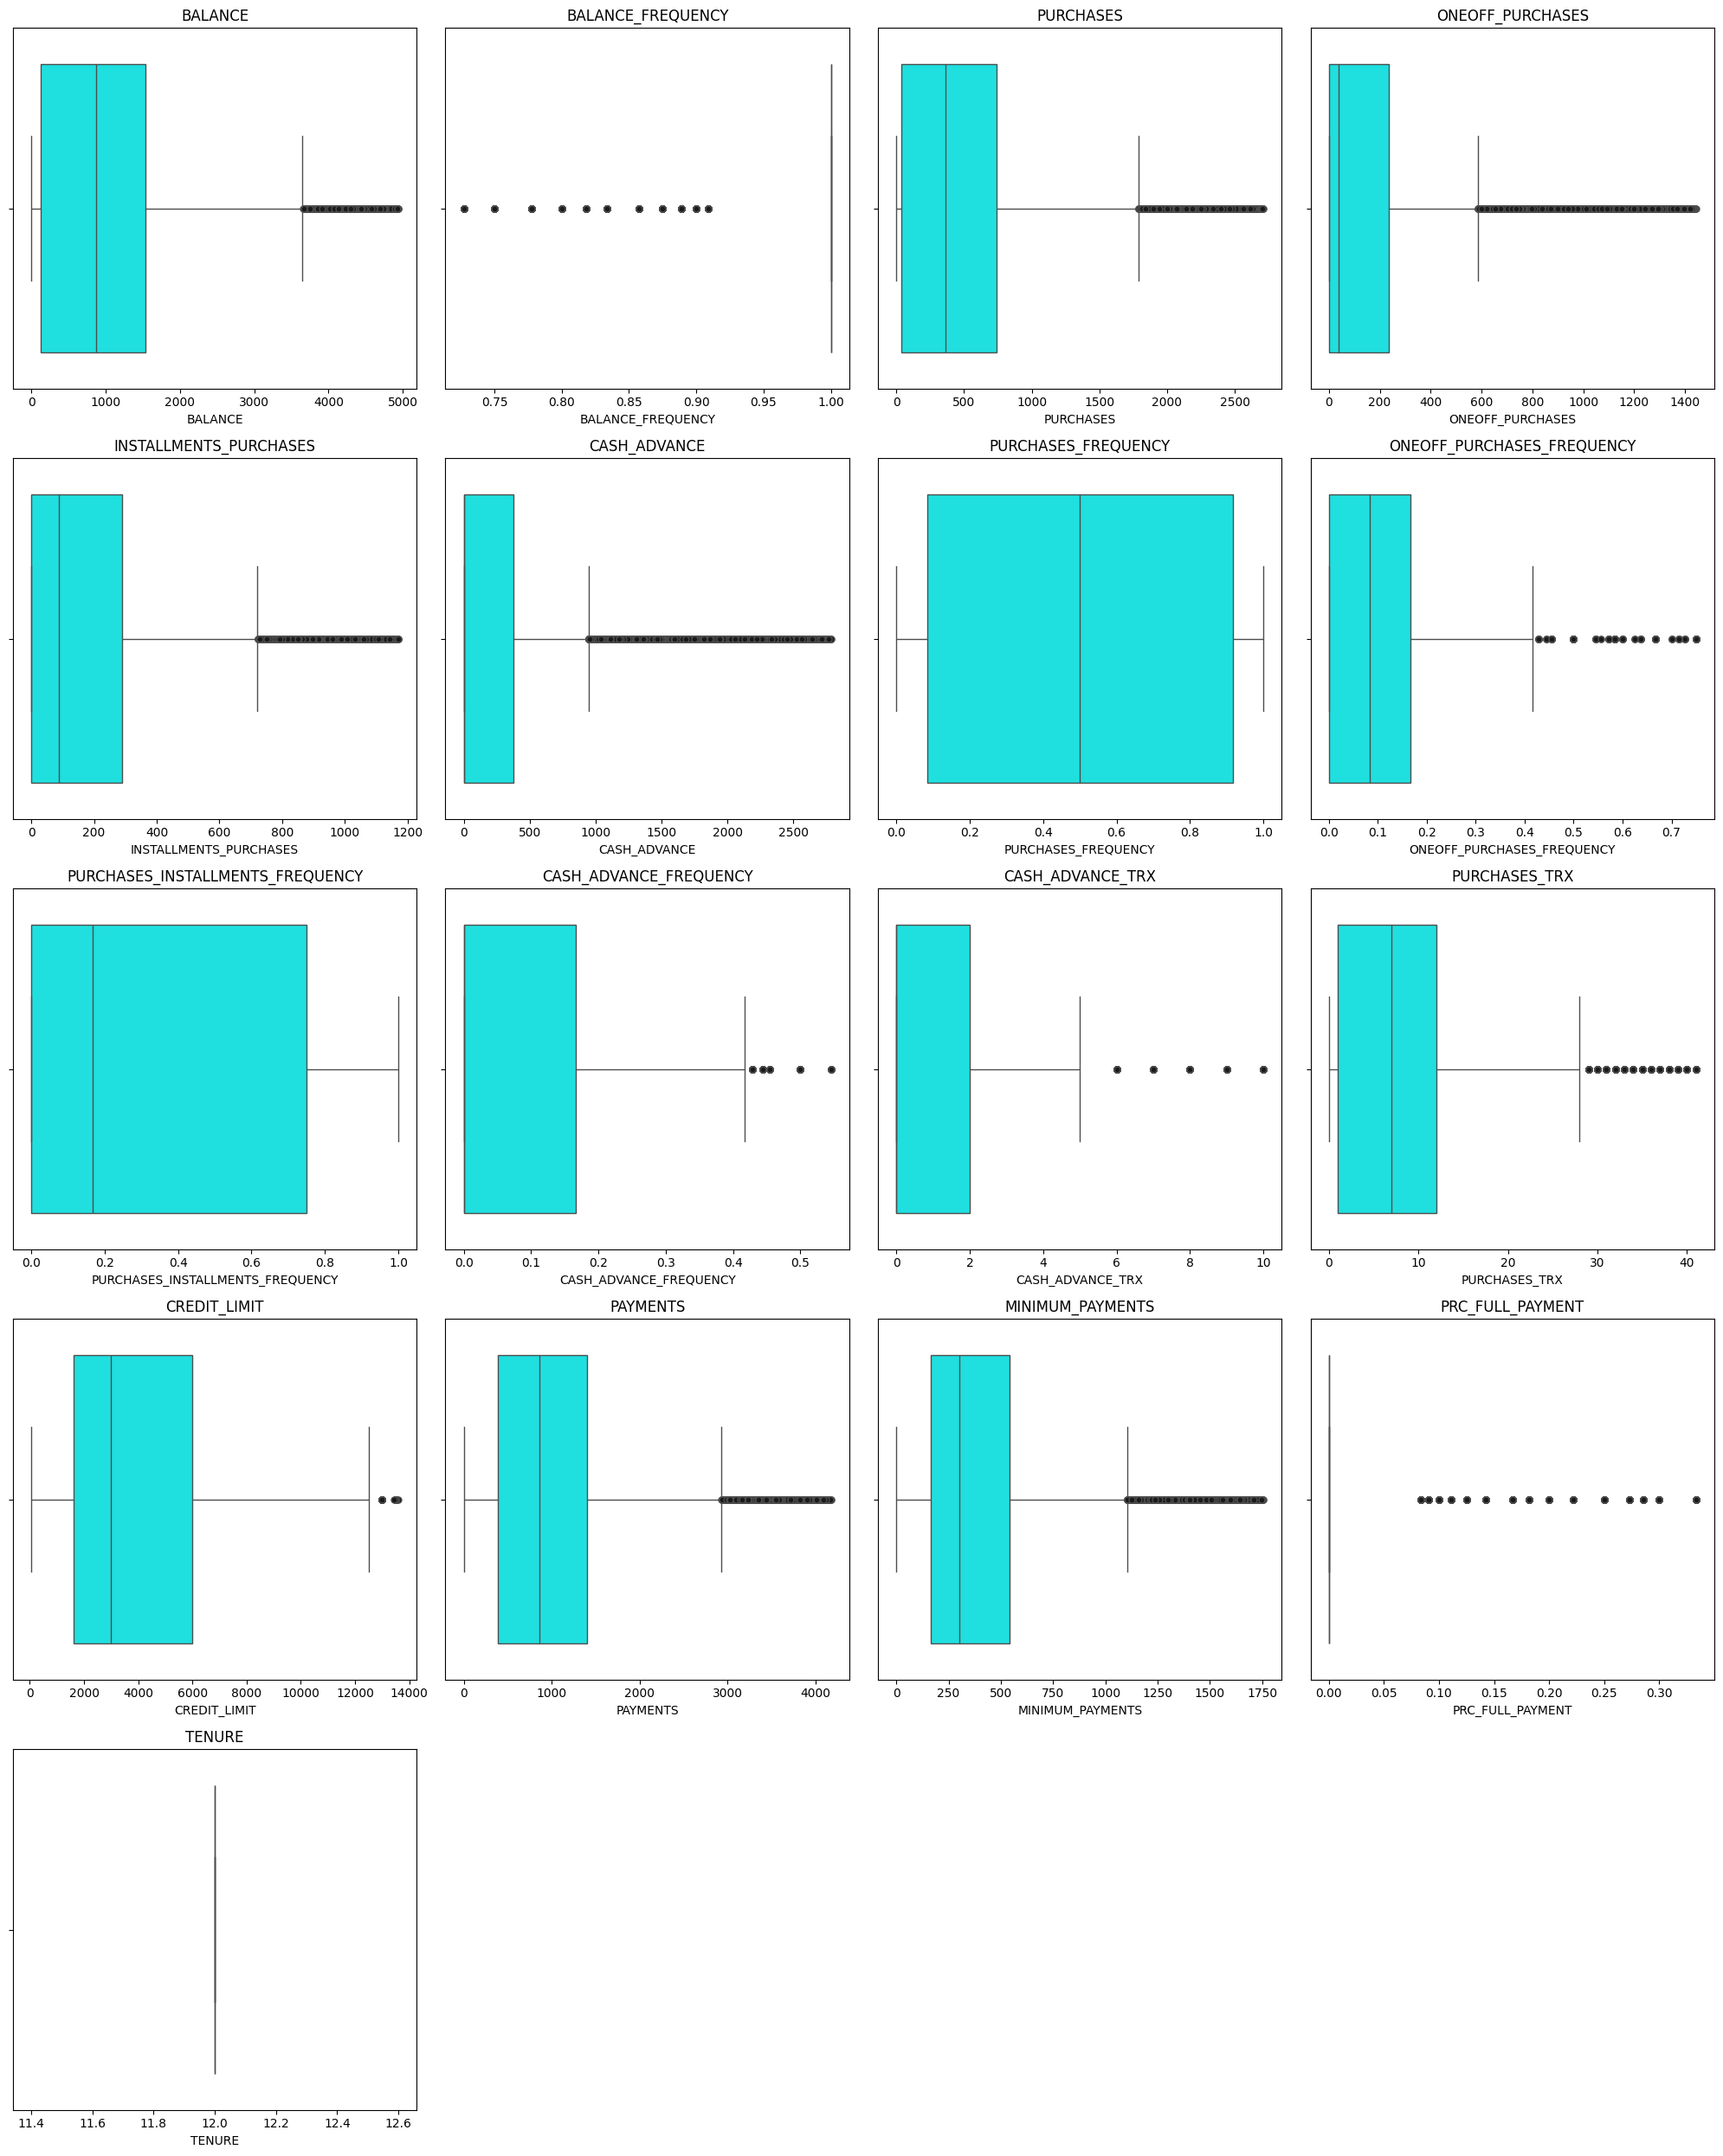

In [ ]:
# Calculate the number of rows and columns needed for subplots
num_cols = len(dff_imputed.columns)
rows = (num_cols + 3) // 4  # Ceiling division to determine the number of rows

# Create subplots
plt.figure(figsize=(20, 5 * rows))

# Plot boxplots
for i, column in enumerate(dff_imputed.columns, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=dff_imputed[column], color='aqua',
                flierprops=dict(markerfacecolor='0.10', markersize=5))
    plt.title(column)
    plt.tight_layout()

plt.show()


### Applying Normalizarion on the data

Final Sequence: Summary
1. Handle Missing Values:
 * Impute missing data to ensure completeness.
2. Outlier Detection and Removal:
 * Identify and handle outliers without interference from missing or scaled data.
3.  Normalization:
 * Scale the data only after the dataset is complete and cleaned of outliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(dff_imputed)

# Convert the normalized data back to a DataFrame
dff_normalized = pd.DataFrame(normalized_data, columns=dff_imputed.columns)

# Display the first few rows of the normalized data
dff_normalized.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008279,0.333333,0.035178,0.000000,0.081504,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.070111,0.048309,0.079386,0.000000,0.0
1,0.648258,0.666667,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.458333,0.4,0.000000,0.512915,0.982215,0.610269,0.666667,0.0
2,0.505079,1.000000,0.285103,0.535685,0.000000,0.00000,1.000000,0.111111,0.000000,0.000000,0.0,0.292683,0.549815,0.148915,0.356983,0.000000,0.0
3,0.337375,1.000000,0.552749,0.026328,0.000000,0.07391,0.083333,0.111111,0.000000,0.152777,0.1,0.024390,0.549815,0.000000,0.216154,0.000000,0.0
4,0.165525,1.000000,0.005900,0.011085,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.024390,0.084871,0.162385,0.139302,0.000000,0.0


### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
dff_normalized['Cluster'] = kmeans.fit_predict(dff_normalized)

# Check the first few rows to verify the cluster assignments
dff_normalized.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.008279,0.333333,0.035178,0.000000,0.081504,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.070111,0.048309,0.079386,0.000000,0.0,3
1,0.648258,0.666667,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.458333,0.4,0.000000,0.512915,0.982215,0.610269,0.666667,0.0,1
2,0.505079,1.000000,0.285103,0.535685,0.000000,0.00000,1.000000,0.111111,0.000000,0.000000,0.0,0.292683,0.549815,0.148915,0.356983,0.000000,0.0,0
3,0.337375,1.000000,0.552749,0.026328,0.000000,0.07391,0.083333,0.111111,0.000000,0.152777,0.1,0.024390,0.549815,0.000000,0.216154,0.000000,0.0,3
4,0.165525,1.000000,0.005900,0.011085,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.024390,0.084871,0.162385,0.139302,0.000000,0.0,3


### Applying the Elbow Method to Obtain best n_clusters

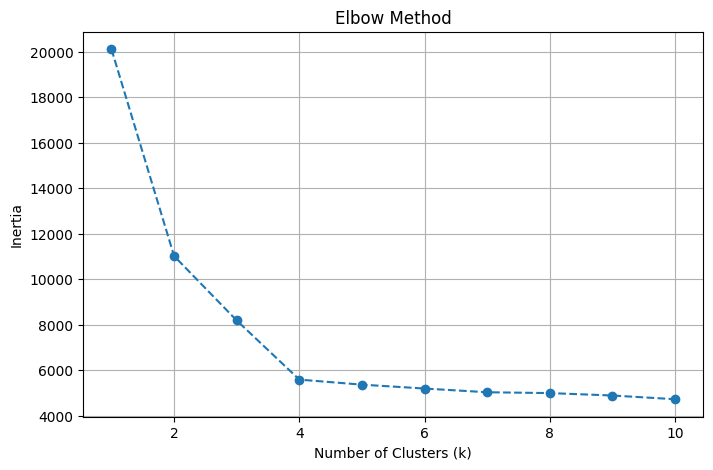

In [ ]:
# Use the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dff_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Re-apply K-Means with the optimal number of clusters
optimal_k = 4  # **********************************RReplace with the best k from the Elbow Method **********************************
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
dff_normalized['Optimal_Cluster'] = kmeans_optimal.fit_predict(dff_normalized)

# Check the updated DataFrame
dff_normalized.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Optimal_Cluster
0,0.008279,0.333333,0.035178,0.000000,0.081504,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.070111,0.048309,0.079386,0.000000,0.0,3,1
1,0.648258,0.666667,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.458333,0.4,0.000000,0.512915,0.982215,0.610269,0.666667,0.0,1,3
2,0.505079,1.000000,0.285103,0.535685,0.000000,0.00000,1.000000,0.111111,0.000000,0.000000,0.0,0.292683,0.549815,0.148915,0.356983,0.000000,0.0,0,0
3,0.337375,1.000000,0.552749,0.026328,0.000000,0.07391,0.083333,0.111111,0.000000,0.152777,0.1,0.024390,0.549815,0.000000,0.216154,0.000000,0.0,3,1
4,0.165525,1.000000,0.005900,0.011085,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.024390,0.084871,0.162385,0.139302,0.000000,0.0,3,1


### Dunn Index Calculation

The provided function calculates the **Dunn Index**, an evaluation metric for clustering quality. The **Dunn Index** is defined as the ratio of the smallest inter-cluster distance to the largest intra-cluster distance, aiming to maximize inter-cluster separation and minimize intra-cluster spread.

Key steps in the function:
1. **Intra-cluster Distance**: Computes the maximum distance between points within the same cluster.
2. **Inter-cluster Distance**: Calculates the minimum distance between points in different clusters.
3. **Dunn Index**: Returns the ratio of minimum inter-cluster distance to maximum intra-cluster distance. A higher Dunn Index indicates better clustering quality.


In [ ]:
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(len(unique_labels)):
        # Extract points for cluster i
        points_i = X[labels == unique_labels[i]]

        # Calculate intra-cluster distances (maximum distance within the same cluster)
        if len(points_i) > 1:  # Avoid calculating for clusters with only one point
            intra_dist = cdist(points_i, points_i, metric='euclidean')
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_dist))

        # Calculate inter-cluster distances with other clusters
        for j in range(i + 1, len(unique_labels)):
            points_j = X[labels == unique_labels[j]]
            dist = cdist(points_i, points_j, metric='euclidean')
            min_inter_cluster_dist = min(min_inter_cluster_dist, np.min(dist))

    # Avoid division by zero if all clusters are identical
    if max_intra_cluster_dist == 0:
        return np.inf  # Indicates perfect clustering (all points in one cluster)

    return min_inter_cluster_dist / max_intra_cluster_dist


In [ ]:

# Calculate Silhouette Coefficient for the clustering
silhouette_avg = silhouette_score(dff_normalized, dff_normalized['Optimal_Cluster'])

# Display the Silhouette Coefficient
print(f"Silhouette Coefficient for K-means clustering: {silhouette_avg:.3f}")

# Dunn Index
dunn_index_KMeans = dunn_index(dff_normalized.values, dff_normalized['Optimal_Cluster'])
print(f"Dunn Index for K-means Clustering: {dunn_index_KMeans}")


Silhouette Coefficient for K-means clustering: 0.542
Dunn Index for K-means Clustering: 0.5351037773543807


### Apply PCA with 95% variance retention
In that part i tried to apply different approach with PCA to retain the 95% of the variance ratio rather than determine the n_components manually

Then i applied Elbow Method to know what are the PCA components would be retained for 95% perecent and as a result the 95% made dimentionality reduction from 18 to 11 PCA and if we Look at the Elbow method the elbow point will show 3 PCA reduced and that will appear when we print the `pca.explained_variance_ratio_`  that the first 3 PCA components are the highest variance ratio

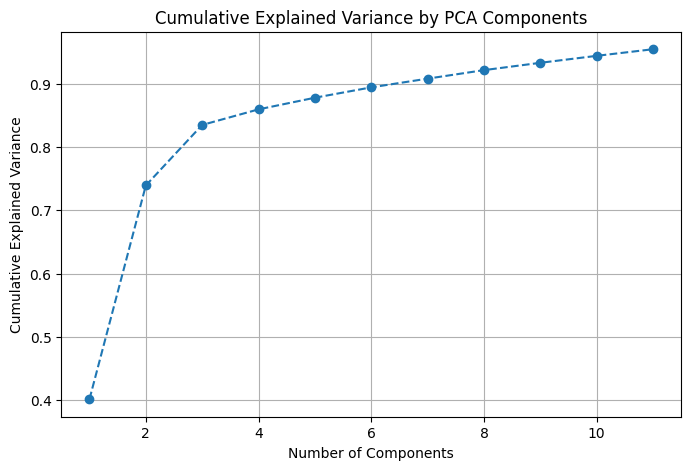

Number of components to retain 95% variance: 11


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with 0.95 variance retention
pca = PCA(n_components=0.95)
pca_reduced = pca.fit_transform(dff_normalized)

# Calculate and plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(f"Number of components to retain 95% variance: {pca.n_components_}")


In [ ]:
print(pca.explained_variance_ratio_)

[0.40126587 0.33812433 0.09574659 0.02465195 0.01843708 0.01636586
 0.01380157 0.0134618  0.01159078 0.01103193 0.01045146]


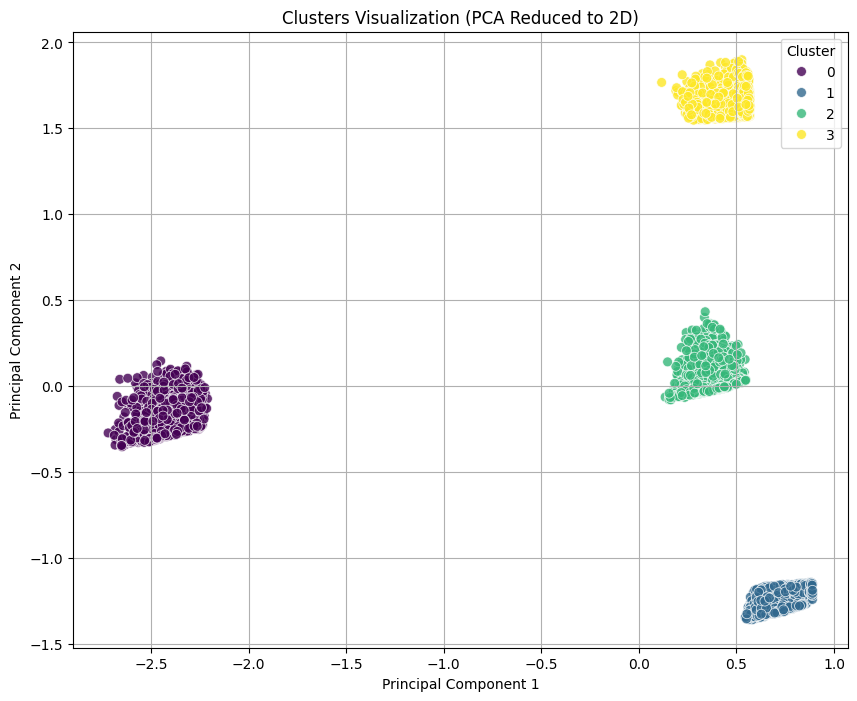

In [ ]:
# Reduce the data to 2D for visualization
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(dff_normalized)

# Add the cluster labels to the PCA-reduced data
pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = dff_normalized['Optimal_Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=pca_2d_df,
    s=50,
    alpha=0.8
)
plt.title('Clusters Visualization (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Apply K-Means Clustering on PCA-Reduced Data (2 Components)

In [ ]:
# Apply PCA to reduce to 2 components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(dff_normalized)

# Apply K-Means clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, random_state=42)  # *****************Replace n_clusters with the optimal number of clusters****************
clusters_pca = kmeans_pca.fit_predict(pca_2d_data)

# Add the cluster labels to the PCA-reduced data
pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = clusters_pca

# Display the first few rows of the PCA-reduced DataFrame
pca_2d_df.head()


,PCA1,PCA2,Cluster
0,2.779614,0.901482,3
1,-3.048294,1.437841,2
2,-2.273426,-2.266323,0
3,2.730653,0.875753,3
4,2.759507,0.928306,3


In [ ]:
print(pca_2d_df.shape)
print(pca_2d_df.columns)

(8950, 3)
Index(['PCA1', 'PCA2', 'Cluster'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize PCA1 and PCA2 columns
pca_2d_df[['PCA1', 'PCA2']] = scaler.fit_transform(pca_2d_df[['PCA1', 'PCA2']])

# Display the first few rows after normalization
print(pca_2d_df.head())


       PCA1      PCA2  Cluster
0  0.984753  0.027868        3
1  0.880535  0.937026        2
2  0.118108  0.360634        0
3  0.961315  0.049032        3
4  0.984639  0.035668        3


#K-Means Clusters Visualization (Normalized PCA reduced Data)

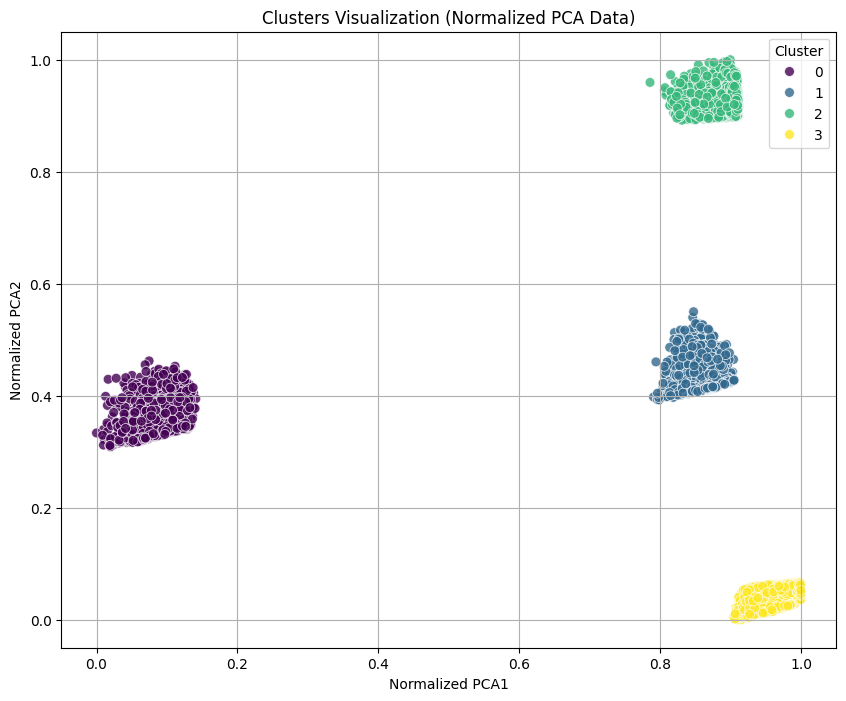

In [ ]:
# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=pca_2d_df,
    s=50,
    alpha=0.8
)
plt.title('Clusters Visualization (Normalized PCA Data)')
plt.xlabel('Normalized PCA1')
plt.ylabel('Normalized PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Calculate Silhouette Coefficient and Dunn Index for K-means clustering after PCA
silhouette_avg = silhouette_score(pca_2d_df[['PCA1', 'PCA2']], pca_2d_df['Cluster'])
dunn_index_KMeans = dunn_index(pca_2d_df[['PCA1', 'PCA2']].values, pca_2d_df['Cluster'].values)

# Display the results
print(f"Silhouette Coefficient for K-means clustering after PCA: {silhouette_avg:.3f}")
print(f"Dunn Index for K-means clustering after PCA: {dunn_index_KMeans:.6f}")


Silhouette Coefficient for K-means clustering after PCA: 0.920
Dunn Index for K-means clustering after PCA: 1.971784


#Apply Heirerircal Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Perform Agglomerative Clustering on dff_normalized
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
dff_normalized['Agglomerative_Cluster'] = agglomerative.fit_predict(dff_normalized)

# Evaluate the clustering with Silhouette Coefficient
silhouette_avg = silhouette_score(dff_normalized, dff_normalized['Agglomerative_Cluster'])
print(f"Silhouette Coefficient for Agglomerative Clustering: {silhouette_avg:.3f}")

# Calculate Dunn Index for Agglomerative Clustering
dunn_index_agglomerative = dunn_index(dff_normalized.values, dff_normalized['Agglomerative_Cluster'])
print(f"Dunn Index for Agglomerative Clustering: {dunn_index_agglomerative}")


Silhouette Coefficient for Agglomerative Clustering: 0.616
Dunn Index for Agglomerative Clustering: 0.6657429030697115


# Visualizing the Dendogram

it shows that it is preferable to use n_clusters = 4

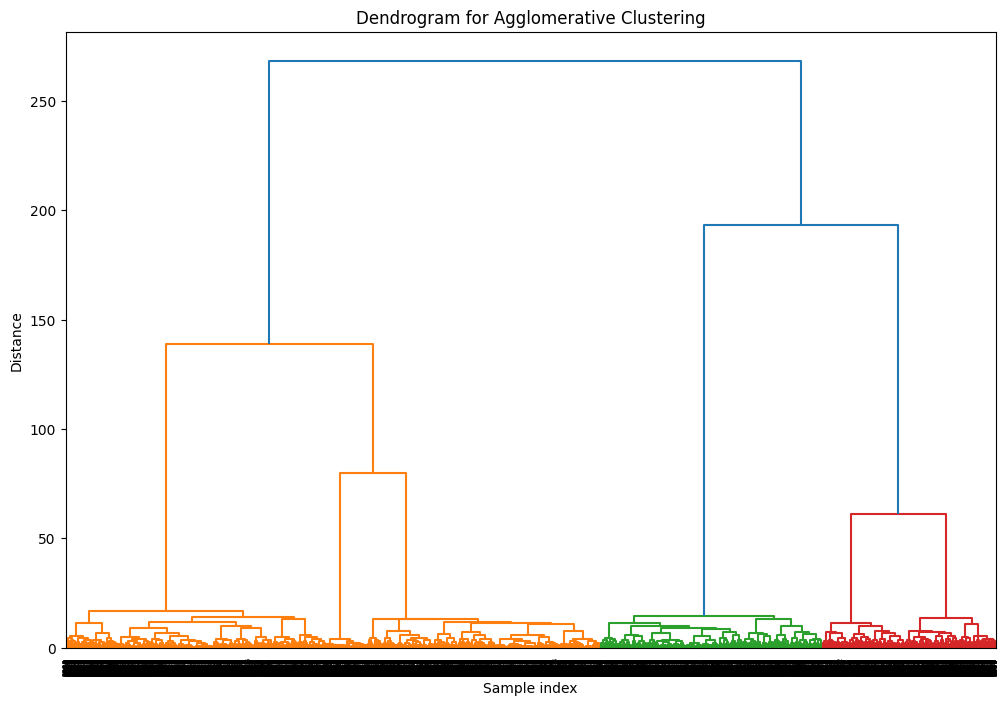

In [ ]:
# Create linkage matrix for agglomerative clustering
linkage_matrix = linkage(dff_normalized, method='ward', metric='euclidean')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


### Plotting Elbow curve based on the silhouette score

Shows that at elbow point the highest value for the evaluation metric silhouette score would be 0.6 at that will happen when n_clusters = 4

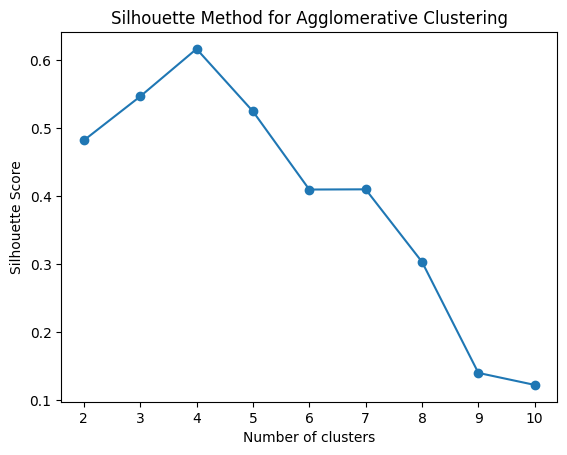

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate the silhouette scores for different values of n_clusters
silhouette_scores = []
for i in range(2, 11):  # Try different values for n_clusters
    agglomerative = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglomerative.fit_predict(dff_normalized)
    silhouette_avg = silhouette_score(dff_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow curve (silhouette score)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Apply PCA to reduce the dataset to 2 components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(dff_normalized)

# Apply Agglomerative Clustering on PCA-reduced data
agglomerative_pca = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_pca = agglomerative_pca.fit_predict(pca_2d_data)

# Create a DataFrame with PCA components and the clusters
pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = clusters_pca




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize PCA1 and PCA2 columns
pca_2d_df[['PCA1', 'PCA2']] = scaler.fit_transform(pca_2d_df[['PCA1', 'PCA2']])

# Display the first few rows after normalization
print(pca_2d_df.head())


       PCA1      PCA2  Cluster
0  0.989243  0.053240        0
1  0.686515  0.932795        3
2  0.076203  0.136501        1
3  0.978305  0.064906        0
4  0.991535  0.059891        0


### Plotting Agglomerative Clustering with PCA reduced data (2 components)

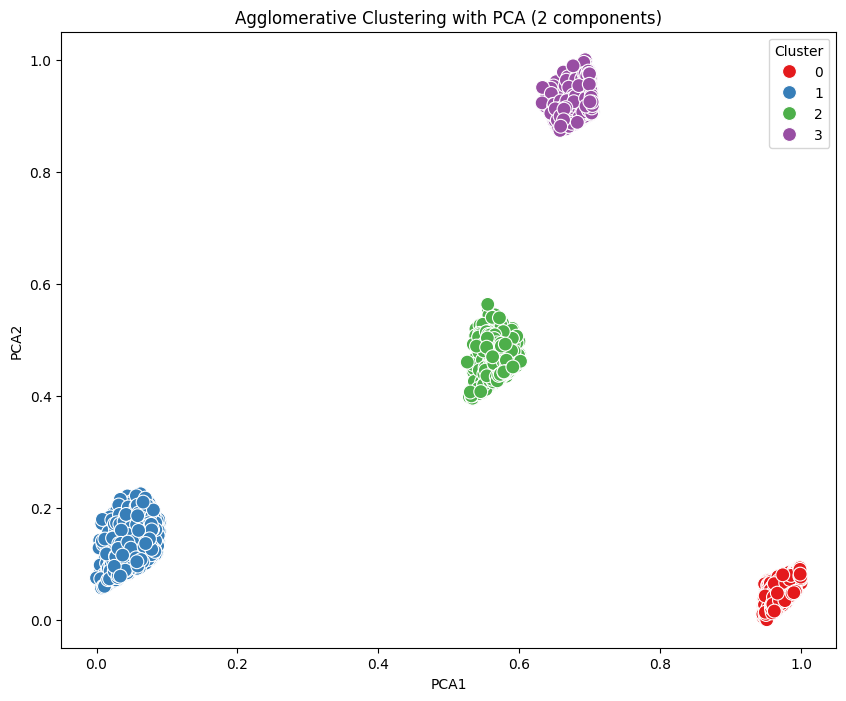

In [ ]:
# Plot the clusters in 2D after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=pca_2d_df, s=100)
plt.title('Agglomerative Clustering with PCA (2 components)')
plt.show()

In [ ]:
# Silhouette Coefficient for Agglomerative Clustering after PCA
silhouette_avg_pca = silhouette_score(pca_2d_data, clusters_pca)
print(f"Silhouette Coefficient for Agglomerative Clustering after PCA: {silhouette_avg_pca:.3f}")

# Dunn Index for Agglomerative Clustering after PCA
dunn_index_agglomerative_pca = dunn_index(pca_2d_data, clusters_pca)
print(f"Dunn Index for Agglomerative Clustering after PCA: {dunn_index_agglomerative_pca}")


Silhouette Coefficient for Agglomerative Clustering after PCA: 0.936
Dunn Index for Agglomerative Clustering after PCA: 1.8457021954300927


# Spectral Clustering

### After many trials to obtain the best values of the Silhouette Coefficient and Dunn Index; I relied on using the No. of clusters is 6 and the affinity is rbf.

## The affinity parameter:
in Spectral Clustering specifies the method to compute the similarity (or affinity) between data points.

## Why rbf?

*   As rbf can handle overlapping clusters better due to its global smoothing effect.





In [ ]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering on dff_normalized
spectral_clustering = SpectralClustering(n_clusters=6, affinity='rbf', random_state=42)
dff_normalized['Spectral_Cluster'] = spectral_clustering.fit_predict(dff_normalized)

# Display the first few rows of the data with cluster labels
dff_normalized[['Spectral_Cluster']].head()


,Spectral_Cluster
0,5
1,0
2,1
3,5
4,5


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Coefficient for Spectral Clustering
silhouette_avg_spectral = silhouette_score(dff_normalized, dff_normalized['Spectral_Cluster'])
print(f"Silhouette Coefficient for Spectral Clustering: {silhouette_avg_spectral:.3f}")

# Dunn Index for Spectral Clustering
dunn_index_spectral = dunn_index(dff_normalized.values, dff_normalized['Spectral_Cluster'])
print(f"Dunn Index for Spectral Clustering: {dunn_index_spectral:.3f}")


Silhouette Coefficient for Spectral Clustering: 0.662
Dunn Index for Spectral Clustering: 0.791


In [ ]:
# silhouette_scores_spectral = []
# for i in range(2, 11):  # Try different values for n_clusters
#     spectral_clustering = SpectralClustering(n_clusters=i, affinity='rbf', random_state=42)
#     cluster_labels = spectral_clustering.fit_predict(dff_normalized)
#     silhouette_avg = silhouette_score(dff_normalized, cluster_labels)
#     silhouette_scores_spectral.append(silhouette_avg)

# # Plot the silhouette scores to visualize the elbow
# plt.plot(range(2, 11), silhouette_scores_spectral, marker='o')
# plt.title('Silhouette Method for Spectral Clustering')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()


In [ ]:
# Apply PCA to reduce to 2 components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(dff_normalized)

# Apply Spectral Clustering with the optimal number of clusters from the Elbow Method (use the optimal n_clusters from the previous step)
optimal_clusters = 6  #************************************** Replace with the optimal value from the elbow method************************

spectral_clustering_pca = SpectralClustering(n_clusters=optimal_clusters, affinity='rbf', random_state=42)
clusters_pca = spectral_clustering_pca.fit_predict(pca_2d_data)

# Create a DataFrame for PCA-reduced data with cluster labels
pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = clusters_pca




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize PCA1 and PCA2 columns
pca_2d_df[['PCA1', 'PCA2']] = scaler.fit_transform(pca_2d_df[['PCA1', 'PCA2']])

# Display the first few rows after normalization
print(pca_2d_df.head())


       PCA1      PCA2  Cluster
0  0.993181  0.850820        5
1  0.015339  0.964079        4
2  0.145351  0.181901        3
3  0.984965  0.845387        5
4  0.989807  0.856484        5


### Plotting Spectral Clustering on PCA-reduced Data

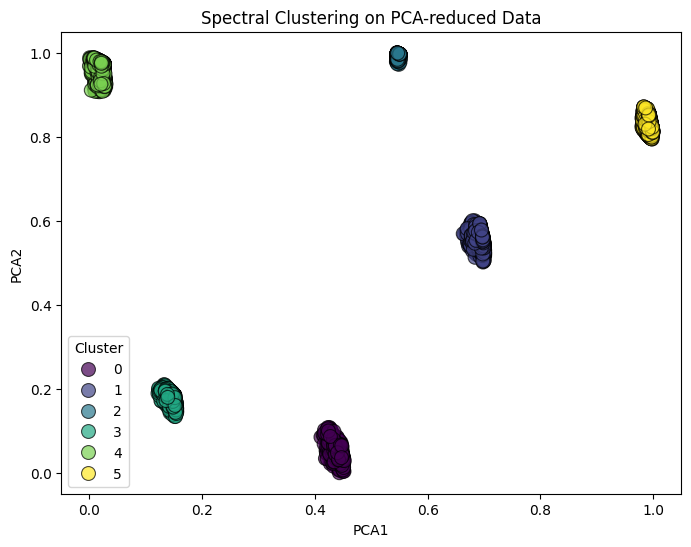

In [ ]:
# Plot the clusters in 2D after PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_2d_df, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Spectral Clustering on PCA-reduced Data')
plt.show()

In [ ]:
# Silhouette Coefficient for Spectral Clustering after PCA
silhouette_avg_spectral_pca = silhouette_score(pca_2d_data, clusters_pca)
print(f"Silhouette Coefficient for Spectral Clustering after PCA: {silhouette_avg_spectral_pca:.3f}")

# Dunn Index for Spectral Clustering after PCA
dunn_index_spectral_pca = dunn_index(pca_2d_data, clusters_pca)
print(f"Dunn Index for Spectral Clustering after PCA: {dunn_index_spectral_pca:.3f}")


Silhouette Coefficient for Spectral Clustering after PCA: 0.956
Dunn Index for Spectral Clustering after PCA: 2.965


### Conclusion Based on Evaluation Metrics:

After analyzing the results of the **Silhouette Coefficient** and **Dunn Index** for the three clustering algorithms (K-means, Agglomerative Clustering, and Spectral Clustering), both before and after reducing the data using PCA to 2 components, the following conclusions can be drawn:

---

#### **1. K-means Clustering**  
- **Before PCA:**
  - Silhouette Coefficient: **0.542**
  - Dunn Index: **0.535**
- **After PCA:**
  - Silhouette Coefficient: **0.920**
  - Dunn Index: **1.972**

The performance of K-means clustering improved significantly after dimensionality reduction with PCA, as seen by the higher Silhouette Coefficient and Dunn Index values. This indicates more compact and well-separated clusters.

---

#### **2. Agglomerative Clustering**  
- **Before PCA:**
  - Silhouette Coefficient: **0.616**
  - Dunn Index: **0.666**
- **After PCA:**
  - Silhouette Coefficient: **0.936**
  - Dunn Index: **1.846**

Agglomerative Clustering also performed better after PCA. Its Silhouette Coefficient and Dunn Index values improved, indicating better-defined clusters.

---

#### **3. Spectral Clustering**  
- **Before PCA:**
  - Silhouette Coefficient: **0.662**
  - Dunn Index: **0.791**
- **After PCA:**
  - Silhouette Coefficient: **0.956**
  - Dunn Index: **2.965**

Spectral Clustering achieved the highest improvement after PCA. Both the Silhouette Coefficient and Dunn Index values significantly increased, showing that clusters became more compact and distinct.

---

### **Best Model:**
The best-performing model is **Spectral Clustering after PCA**, with:
- **Silhouette Coefficient:** **0.956**  
- **Dunn Index:** **2.965**

This result demonstrates that Spectral Clustering effectively captures cluster patterns after reducing the data to 2 components using PCA, making it the most suitable algorithm for this dataset.